# Visualisation data for drummer one: phrases 36 - 89

In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display
import essentia
import essentia.standard as es
import librosa
import librosa.display
import pandas as pd
from collections import Counter
import os
import pandas as pd
from utils import *

In [2]:
# for f in *.csv; do cut -d' ' -f2 --complement $f > onset.$f; done
# cut out annotations and reduce csv-file to one row

In [94]:
beat_outliers = []
beats = []
devs = []

In [112]:
for file in os.listdir('sounds/'):
    
    devs = []
    devs2 = []
    beats=[]
    onsets2 = []
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    #fs=44100
    #t = np.arange(len(audio))/float(fs)
    #plt.plot(t, audio)
    #for loc in idealSixteenths:
    #    plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    #title = file[:-4] 
    #plt.title(title)
    #plt.xlabel('time')
    #plt.ylabel('audio')
    #plt.savefig(filejpg)
    #plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    # read annotated onsets from csv-file
    read_onset = 'onsets/cymbals/' + 'onset.cymbals.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)


    # find nearest neighbour
    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    read_onset2 = 'onsets/hihat/' + 'onset.hihat.' + filename[:-3] + 'csv'
    onsets2 = np.genfromtxt(read_onset2)

    # find nearest neighbour

    for onset in onsets2:
        devs2.append(nearestNeighbour(onset, idealSixteenths))
        
    list1, list2 = zip(*devs) 
    list3, list4 = zip(*devs2) 
    plt.xlim(-0.1, 0.1)
    plt.plot(list2,list1,'o', c='blue')
    plt.plot(list4,list3,'x', c='red')
    plt.savefig('hihatvscymbal/' + filename[:-3] + 'jpg')
    plt.close()

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:55: UserWarning: genfromtxt: Empty input file: "onsets/cymbals/onset.cymbals.071_phrase_shuffle-blues_complex_fast_brushes.csv"


ValueError: need more than 0 values to unpack

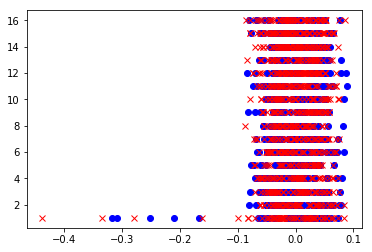

In [97]:
list1, list2 = zip(*devs) 
list3, list4 = zip(*devs2) 
plt.plot(list2,list1,'o', c='blue')
plt.plot(list4,list3,'x', c='red')
#plt.savefig(filename[:-3] + 'jpg')
#plt.close()

In [106]:
def nearestNeighbour(targetValue, vector):
    minIndex = 0
    minDiff = targetValue - vector[0]
    minAbsDiff = abs(minDiff)

    for index, value in enumerate(vector):
        diff = targetValue - value
        absDiff = abs(diff)
        if absDiff < minAbsDiff:
            minIndex = index
            minDiff = diff
            minAbsDiff = absDiff
    minDiff = "%.3f" %minDiff #reduce to three decimals
    minIndex= 1 + minIndex %16 #to reduce all deviations into one bar
    return float(minIndex), float(minDiff)

In [54]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

In [13]:
def heatmap_count(var1):
    countername = []
    elements = []
    for elem in var1:
        c = elem[1]
        elements.append(c)
    elements2 = []
    for elem in var1:
        d = elem[0]
        elements2.append(d)
    a = [-0.100, -0.090, -0.080, -0.070, -0.060, -0.050, -0.040, -0.030, -0.020, -0.010, -0.005, 0, 0.005, 0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100]
    lista = []
    for myNumber in elements:
        b = min(a, key = lambda x:abs(x-myNumber))
        b = "%.3f" %b
        lista.append(float(b))
    
    lista = sorted(lista)
    countername = Counter(lista)
    print countername[-0.100]
    print countername[-0.09]
    print countername[-0.08]
    print countername[-0.07]
    print countername[-0.06]
    print countername[-0.05]
    print countername[-0.04]
    print countername[-0.03]
    print countername[-0.02]
    print countername[-0.01]
    print countername[-0.005]
    print countername[0]
    print countername[0.005]
    print countername[0.01]
    print countername[0.02]
    print countername[0.03]
    print countername[0.04]
    print countername[0.05]
    print countername[0.06]
    print countername[0.07]
    print countername[0.08]
    print countername[0.09]
    print countername[0.1]    

In [70]:
heatmap_count(ids_fifteen)

0
0
1
0
3
0
3
0
4
0
0
2
0
3
1
2
4
3
0
0
0
0
0


# #1 BASS DRUM 

In [414]:
#ids_one, ids_two, ids_three, ids_four, ids_five, ids_six, ids_seven, ids_eight, ids_nine, ids_ten, ids_eleven, ids_twelve, ids_thirteen, ids_fourteen, ids_fifteen, ids_sixteen = []
beats = []
devs = []
#c_one,c_two,c_three,c_four,c_five,c_six,c_seven,c_eight,c_nine,c_ten,c_eleven,c_twelve,c_thirteen,c_fourteen,c_fifteen,c_sixteen = []

In [415]:
for file in os.listdir('sounds/drummer1/salsa'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    # read annotated onsets from csv-file
    read_onset = 'onsets/bass/' + 'onset.bass.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.061_phrase_salsa_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.048_phrase_afro_simple_slow_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.062_phrase_salsa_simple_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.085_phrase_waltz_simple_medium_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.084_phrase_waltz_simple_slow_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.ba

In [416]:
# note down which song doesn't have input!!

In [417]:
# do I have to declare them as empty arrays before running the code again?

ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

In [438]:
heatmap_count(ids_one, ids_two, ids_three, ids_four)

Counter({-0.08: 1,
         -0.07: 2,
         -0.05: 3,
         -0.03: 3,
         -0.02: 5,
         -0.01: 4,
         -0.005: 3,
         0.0: 3,
         0.005: 1,
         0.01: 2,
         0.02: 1,
         0.03: 3,
         0.04: 3,
         0.05: 1,
         0.08: 1})

# #2: SNARE (and co.)

In [88]:
# for f in *.csv; do grep -E 'sweep|sticks|sd|rs|cs' $f > test.$f; done 
# for f in *.csv; do cut -d' ' -f2 --complement $f > onset.$f; done

In [439]:
beat = []
devs = []
for file in os.listdir('sounds/drummer1/salsa'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    # read annotated onsets from csv-file
    read_onset = 'onsets/snare/' + 'onset.snare.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:33: UserWarning: genfromtxt: Empty input file: "onsets/snare/onset.snare.048_phrase_afro_simple_slow_mallets.csv"


In [441]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

In [458]:
heatmap_count(ids_one, ids_two, ids_three, ids_four)

Counter({-0.09: 1,
         -0.08: 1,
         -0.07: 1,
         -0.06: 1,
         -0.05: 1,
         -0.04: 4,
         -0.03: 3,
         -0.02: 6,
         -0.01: 5,
         -0.005: 3,
         0.0: 2,
         0.005: 2,
         0.01: 3,
         0.02: 4,
         0.03: 3,
         0.04: 3,
         0.05: 5,
         0.09: 1})

# #3: HI-HATS AND CYMBALS
#3: hi-hat (closed) (chh), hi-hat (open) (ohh), cowbell (cb), other cymbals (c)

In [459]:
beat = []
devs = []
for file in os.listdir('sounds/drummer1/salsa'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    # save metrical grid to file
    # should be used for later analysis of the instruments

    #filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    #np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/hihat/' + 'onset.hihat.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.048_phrase_afro_simple_slow_mallets.csv"


The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.085_phrase_waltz_simple_medium_brushes.csv"


The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.084_phrase_waltz_simple_slow_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.050_phrase_afro_simple_fast_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.049_phrase_afro_simple_medium_mallets.csv"


The song is probably in 4/4


In [460]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

In [505]:
heatmap_count(ids_one, ids_two, ids_three, ids_four)

0
0
2
4
3
2
9
11
8
9
2
5
2
10
7
7
5
7
1
1
0
0
0


# #5: Toms

In [507]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    fs=44100
    t = np.arange(len(audio))/float(fs)
    #plt.plot(t, audio)
    #for loc in idealSixteenths:
    #    plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    #title = file[:-4] 
    #plt.title(title)
    #plt.xlabel('time')
    #plt.ylabel('audio')
    # plt.savefig(filejpg)
    #plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    #filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    #np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/toms/' + 'onset.toms.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.037_phrase_disco_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.066_phrase_shuffle-blues_simple_slow_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.086_phrase_waltz_simple_fast_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.036_phrase_disco_simple_slow_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.044_phrase_rock_simple_fast_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset

In [509]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

In [526]:
heatmap_count(ids_one, ids_two, ids_three, ids_four)

0
0
0
1
0
0
3
1
2
1
2
1
3
2
0
1
4
3
0
1
0
0
0


# #6 Cymbals

In [129]:
#6: ride cymbal (rc), chinese ride cymbal (ch), crash cymbal (cr), splash cymbal (spl)

In [108]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    file = filename
    filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    fs=44100
    t = np.arange(len(audio))/float(fs)
    #plt.plot(t, audio)
    #for loc in idealSixteenths:
    #    plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    #title = file[:-4] 
    #plt.title(title)
    #plt.xlabel('time')
    #plt.ylabel('audio')
    #plt.savefig(filejpg)
    #plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/cymbals/' + 'onset.cymbals.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/cymbals/onset.cymbals.071_phrase_shuffle-blues_complex_fast_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/cymbals/onset.cymbals.044_phrase_rock_simple_fast_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/cymbals/onset.cymbals.061_phrase_salsa_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/cymbals/onset.cymbals.048_phrase_afro_simple_slow_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:57: UserWarning: genfromtxt: Empty input file: "onsets/cymbals/onset.cymbals.062_phrase_salsa_simple_fast_sticks.csv"


KeyboardInterrupt: 

In [556]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

In [572]:
heatmap_count(ids_one, ids_two, ids_three, ids_four)

0
0
0
2
2
1
5
8
3
5
1
3
3
5
4
3
2
0
3
2
0
0
0
